# DSE200x Week 6 Mini Project by Liyang(Leon) Guan 

## Dataset: The Soccer Data


<br> 
The original dataset was collected from: <a href="https://www.kaggle.com/hugomathien/soccer">Soccer Dataset</a> 

## 0. Libraries & Data Ingestion 

<p>Relevant Python Libraries and the soccer dataset itself will be imported in this section.</p>

In [1]:
# python libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import soccer dataset as a dataframe.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

## 1. Initial Data Exploration 

<p> In this step, an initial exploration of the dataset will be conduced to further determine the research question and to gain some initial insights into the data. </p>

In [3]:
# dataset columns/attributes

df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [4]:
# peek at the data values

df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
player_fifa_api_id,218353,218353,218353,218353,218353,189615,189615,189615,189615,189615
player_api_id,505942,505942,505942,505942,505942,155782,155782,155782,155782,155782
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00,2016-04-21 00:00:00,2016-04-07 00:00:00,2016-01-07 00:00:00,2015-12-24 00:00:00,2015-12-17 00:00:00
overall_rating,67,67,62,61,61,74,74,73,73,73
potential,71,71,66,65,65,76,76,75,75,75
preferred_foot,right,right,right,right,right,left,left,left,left,left
attacking_work_rate,medium,medium,medium,medium,medium,high,high,high,high,high
defensive_work_rate,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
crossing,49,49,49,48,48,80,80,79,79,79


In [5]:
# datadrame original shape

df.shape

(183978, 42)

## 2. Research Question

<p>The following research question is decided to be the center of this analysis project.</p>
<br>
<p><b>Question</b>: Do right-footed players generally perform better than left-footed players in terms of overall_rating & potential respectively or vice versa? </p>

<p><b>Motivation</b>: When recruiting soccer players, a number of factors usually need to be considered. If we could have a list of factors that are most important in determining a player’s performance, then the recruitment process can be made easier for the managers/recruiters. In this study, I will focus only on whether we should consider <b>preferred_foot</b> while recruiting. But I am not implying this will be the only factor that they should consider. </p>

## 3. Data Cleaning 

This section involves the following steps: 
<ul>
<li>Removing null & missing values in the original soccer dataset.</li>
<li>Investigate the number of left-footed players & right-footed players.</li>
<li> Extract only the relevant columns for this analysis. </li>
</ul>

In [6]:
# remove rows that contains null values

if df.isnull().any().any():
    df = df.dropna()
    
df.shape

(180354, 42)

In [7]:
# the number of remaining left-footed players

len(df[df.preferred_foot == "left"])

44107

In [8]:
# the number of remaining right-footed players

len(df[df.preferred_foot == "right"])

136247

<p>Notice that we have more right-footed players than left-footed players.</p>
<p>Since both numbers are roughly in the same magnitude (3 * left_footed_players == right_footed_players), this is actually considered okay for further analysis.</p>

In [9]:
# extract targeting columns to form a new compact dataframe. 

df = df[["overall_rating", "potential", "preferred_foot"]]

df.shape

(180354, 3)

In [10]:
df.head(10)

,overall_rating,potential,preferred_foot
0,67.0,71.0,right
1,67.0,71.0,right
2,62.0,66.0,right
3,61.0,65.0,right
4,61.0,65.0,right
5,74.0,76.0,left
6,74.0,76.0,left
7,73.0,75.0,left
8,73.0,75.0,left
9,73.0,75.0,left


## 4. Core Data Exploration

<p>In this section, proper data exploration is conducted to answer the research question proposed in Section 2. </p>
<p>Data Visualizations (i.e. plots) will be included along the research process.</p>
<p>Decisions & Justifications:</p>
<ul>
<li>Since the mean/average is heavily influenced by outliers, making comparisons of the distributions will potentially be more informative and credible. </li> 
<li>Band widths for kernel density plots are determined to be 2 to ensure smoothness without losing much information.</li>
<li> For each plot, both left-footed players and right-footed players are plotted side-by-side so that making comparisons can be done easily. </li>
</ul>

In [11]:
# separate left-footed players and right-footed players

left_footed_players = df[df.preferred_foot == "left"]
right_footed_players = df[df.preferred_foot == "right"]

len(left_footed_players), len(right_footed_players)

(44107, 136247)

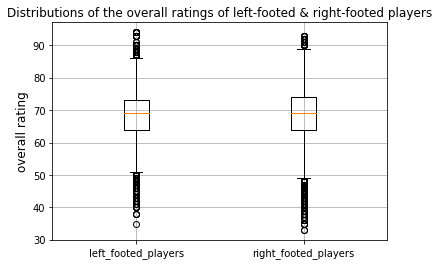

In [12]:
# the box plot of left-footed & right-footed players vs. their overall ratings 
%matplotlib inline

plt.boxplot(x = [left_footed_players["overall_rating"], right_footed_players["overall_rating"]],
            labels = ["left_footed_players", "right_footed_players"])
plt.title("Distributions of the overall ratings of left-footed & right-footed players")
plt.grid(True)
plt.ylabel("overall rating", fontsize=12)
plt.show()

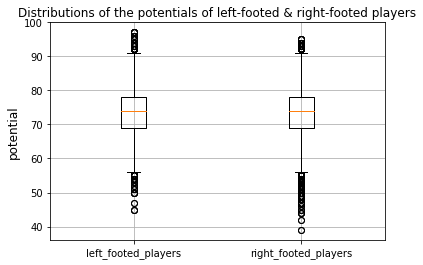

In [13]:
# the box plot of left-footed & right-footed players vs. their potentials

plt.boxplot(x = [left_footed_players["potential"], right_footed_players["potential"]],
            labels = ["left_footed_players", "right_footed_players"])
plt.title("Distributions of the potentials of left-footed & right-footed players")
plt.grid(True)
plt.ylabel("potential", fontsize=12)
plt.show()

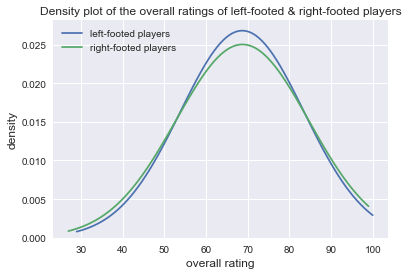

In [14]:
# kernel density plot of left-footed & right-footed players vs. their overall ratings 
import seaborn as sns
sns.set(color_codes=True)

sns.kdeplot(left_footed_players["overall_rating"], bw=2, label="left-footed players")
sns.kdeplot(right_footed_players["overall_rating"], bw=2, label="right-footed players")

plt.legend()
plt.title("Density plot of the overall ratings of left-footed & right-footed players")
plt.ylabel("density", fontsize=12)
plt.xlabel("overall rating", fontsize=12)
plt.show()


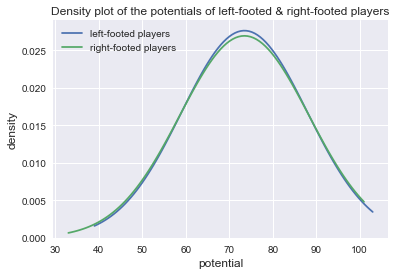

In [15]:
# kernel density plot of of left-footed & right-footed players vs. their potentials

sns.kdeplot(left_footed_players["potential"], bw=2, label="left-footed players")
sns.kdeplot(right_footed_players["potential"], bw=2, label="right-footed players")

plt.legend()
plt.title("Density plot of the potentials of left-footed & right-footed players")
plt.ylabel("density", fontsize=12)
plt.xlabel("potential", fontsize=12)
plt.show()

## 5. Findings & Conclusions

#### Findings
<ul>
<li>Box Plots</li>
    <ul>
        <li> Surprisingly, the <a href="https://en.wikipedia.org/wiki/Interquartile_range">interquartile ranges</a> in both box plots of overall_ratings and potentials are extremely similar (almost identical) across left-footed players and right-footed players. So are the medians in both box plots. </li>
        <li> Both left-footed players and right-footed players have a significant amount of outliers in both box plots. Generally, left-footed players will have slightly more outliers at the top than right-footed players.</li>
    </ul>
<li>Kernel Density Plots  </li>
    <ul>
        <li>Two curves in both kernel density plots are very close to each other.</li>
        <li>In the overall ratings kernel density plot, left-footed players are slightly more concentrated in the middle range (roughly 60-80) than right-footed players. But in the potential kernel density plot, this slight advantage is not that obvious compared to the overall ratings kernel density plot. </li>
        <li>Both tails in those two kernel density plots are all very similar. Nothing outstanding about tails. </li>
    </ul>
</ul>
<p><b>Notice that all the differences shown on the plots are all considered to be visually insignificant. </b></p>

#### Conclusions

<p>Based upon the above data analysis, it is safe to say that generally left-footed players and right-footed players perform equally well in terms of overall_rating and potential. Therefore, there is no need to be in favor of a specific preferred foot player in the recruitment process.  </p>

<br>

<br>